In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

import sys as sys
sys.path.append('..')

from bayes.regression.linearparametric import BayesLinear as Model
from bayes.regression.linearparametric.bases import polynomialType as phi

### Test Data

<IPython.core.display.Javascript object>


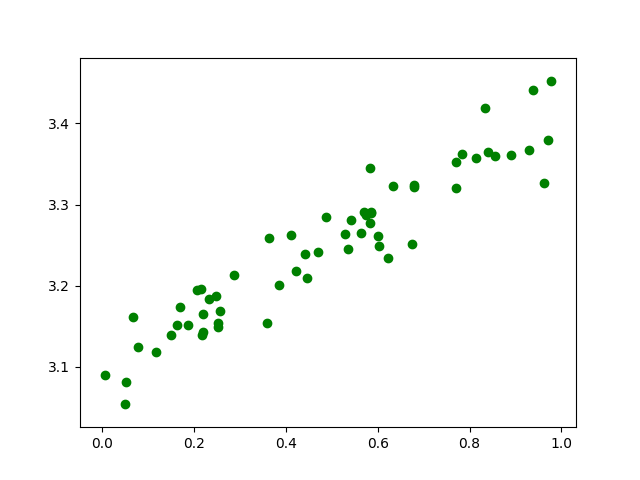

In [74]:
m_true = 0.3
b_true = 3.1
N = 60
std = .03

tx = np.random.rand(N)
ty = np.random.randn(N) * std + (tx*m_true + b_true)

plt.scatter(tx, ty, c='green')

### Structured Noise

<IPython.core.display.Javascript object>


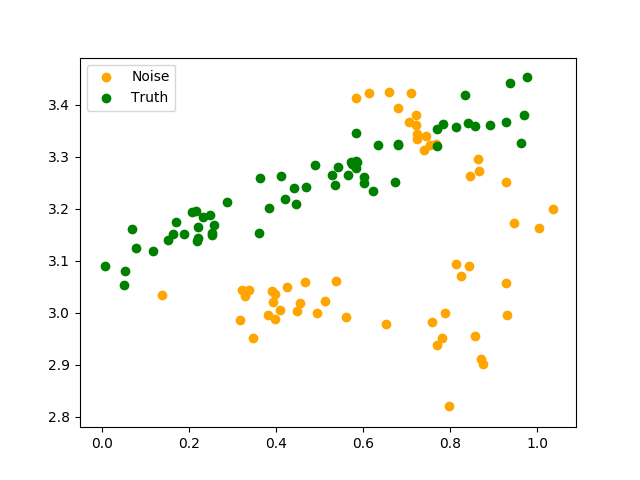

In [75]:
n1 = np.random.randn(15, 2)*0.1 + np.array([0.8, 3.00])
n2x = np.random.randn(20) * 0.1 + 0.8
n2y = np.random.randn(20) * 0.02 + (n2x*-0.6 + 3.8)
n3x = np.random.randn(20) * 0.1 + 0.4
n3y = np.random.randn(20) * 0.02 + (n2x*-0.1 + 3.1)

plt.scatter(n1[:, 0], n1[:, 1], c='orange', label="Noise")
plt.scatter(n2x, n2y, c='orange')
plt.scatter(n3x, n3y, c='orange')
plt.scatter(tx, ty, c='green', label="Truth")
plt.legend()

x = np.hstack((tx, n1[:, 0], n2x, n3x))
t = np.hstack((ty, n1[:, 1], n2y, n3y))

### Fit

<IPython.core.display.Javascript object>


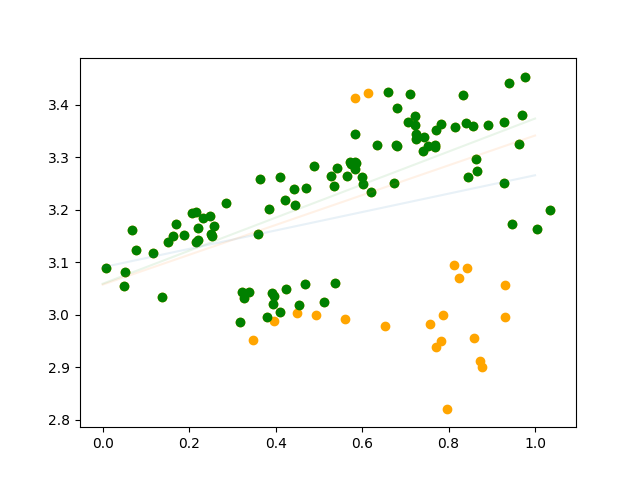

94 94


In [112]:
def compute_scores_l1(x, t, m, b):
    return np.fabs(((x*m + b) - t))

xbest, tbest = x, t

last_score_std = np.inf

cull_percent = 0.1

mbs = []

while True:
    
    if not len(xbest):
        raise Exception("Did not converge.")
    
    m, b, r, p, stderr = stats.linregress(xbest, tbest)
    
    mbs.append((m, b))
    
    score = compute_scores_l1(xbest, tbest, m, b)
    score_std = np.std(score)
    
    if score_std > .9005*last_score_std:
        break
    
    last_score_std = score_std
    
    cullN = int(len(score)*cull_percent)
    argkeep = np.argpartition(score, -cullN)[:-cullN]

    xbest, tbest = xbest[argkeep], tbest[argkeep]

for m, b in mbs:
    plt.plot([0, 1], [b, m+b], alpha=0.1)
plt.scatter(x, t, c='orange')
print(len(xbest), len(tbest))
plt.scatter(xbest, tbest, c='green')
